In [1]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [43]:
from scipy.stats import pearsonr

In [2]:
folder_2_task = {'1v9': 'vs 9', 'high_vs_95low': 'vs Non-binder', 'high_vs_looser': 'vs Weak', '1v1': 'vs 1'}
task_2_folder = {'vs 9':'1v9', 'vs Non-binder':'high_vs_95low', 'vs Weak': 'high_vs_looser', 'vs 1':'1v1'}

In [3]:
perf_df = pd.read_csv('../data/openset_performance.tsv', sep='\t')
perf_df[['train_task', 'train_ag', 'train_neg', 'seed_id', 'split_id']] = perf_df.task_1.str.split('__', expand=True)
perf_df[['test_task', 'test_ag', 'test_neg', 'test_seed_id', 'test_split_id']] = perf_df.task_2.str.split('__', expand=True)
perf_df.drop(['task_1', 'task_2'], inplace=True, axis=1)
task_rename = {'ONE_VS_NINE': 'vs 9', 'HIGH_VS_95LOW': 'vs Non-binder', 'HIGH_VS_LOOSER': 'vs Weak'}
perf_df['train_task'] = perf_df['train_task'].apply(lambda x: task_rename[x])
perf_df['test_task'] = perf_df['test_task'].apply(lambda x: task_rename[x])

In [4]:
df_1vs1 = pd.read_csv('../data/1vs1_perf.tsv', sep='\t', index_col=0)

df_1vs1_open = pd.read_csv('../data/1vs1_perf_open.tsv', sep='\t', index_col=0)
df_1vs1_open['test_neg'] = 'auto'

perf_on_vs1 = pd.read_csv('../data/perf_on_vs1.tsv', sep='\t', index_col=0)
perf_on_vs1.rename(columns={'pos_ag':'train_ag', 'neg_ag':'train_neg', 'pos_ag.1':'test_ag', 'neg_ag.1':'test_neg','prec':'precision'}, inplace=True)
perf_on_vs1.drop(['seed_id.1', 'split_id.1'], inplace=True, axis=1)
perf_on_vs1['train_neg'] = 'auto'
perf_on_vs1['train_task'] = perf_on_vs1['train_task'].apply(lambda x: folder_2_task[x])
#perf_df.drop(columns=['test_split_id', 'test_seed_id'], inplace=True, axis=1)
#df_1vs1_open.drop(columns=['test_split_id', 'test_seed_id'], inplace=True, axis=1)
df_1vs1_open['test_task'] = df_1vs1_open['test_task'].apply(lambda x: folder_2_task[x])
perf_df = pd.concat([perf_df,df_1vs1, df_1vs1_open, perf_on_vs1], axis=0)


"df_1vs1 = pd.read_csv('../data/1vs1_perf.tsv', sep='\t', index_col=0)\n\ndf_1vs1_open = pd.read_csv('../data/1vs1_perf_open.tsv', sep='\t', index_col=0)\ndf_1vs1_open['test_neg'] = 'auto'\n\nperf_on_vs1 = pd.read_csv('../data/perf_on_vs1.tsv', sep='\t', index_col=0)\nperf_on_vs1.rename(columns={'pos_ag':'train_ag', 'neg_ag':'train_neg', 'pos_ag.1':'test_ag', 'neg_ag.1':'test_neg','prec':'precision'}, inplace=True)\nperf_on_vs1.drop(['seed_id.1', 'split_id.1'], inplace=True, axis=1)\nperf_on_vs1['train_neg'] = 'auto'\nperf_on_vs1['train_task'] = perf_on_vs1['train_task'].apply(lambda x: folder_2_task[x])\n#perf_df.drop(columns=['test_split_id', 'test_seed_id'], inplace=True, axis=1)\n#df_1vs1_open.drop(columns=['test_split_id', 'test_seed_id'], inplace=True, axis=1)\ndf_1vs1_open['test_task'] = df_1vs1_open['test_task'].apply(lambda x: folder_2_task[x])\nperf_df = pd.concat([perf_df,df_1vs1, df_1vs1_open, perf_on_vs1], axis=0)\n\nperf_open_df = perf_df[perf_df['train_task'] != perf_df[

In [5]:
perf_df_mean = perf_df.groupby(['train_task', 'train_ag', 'train_neg', 'test_task', 'test_ag', 'test_neg']).mean().reset_index()

In [6]:
df_closed = perf_df[perf_df['train_task'] == perf_df['test_task']]#redifine what is open and closed in including vs 1

In [7]:
df_id_dict = df_closed.groupby(['train_task', 'train_ag', 'train_neg']).mean().to_dict('index')

In [8]:
perf_open_df_mean = perf_df_mean[perf_df_mean['train_task'] != perf_df_mean['test_task']]

In [9]:
perf_open_df_mean['ID acc'] =  perf_open_df_mean.apply(lambda x: df_id_dict[(x['train_task'],x['train_ag'])]['acc'], axis=1)

/var/folders/ww/bptfq9n12_jbyy78qcjp7s4c0000gn/T/ipykernel_93761/75440538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_open_df_mean['ID acc'] =  perf_open_df_mean.apply(lambda x: df_id_dict[(x['train_task'],x['train_ag'])]['acc'], axis=1)


<AxesSubplot:xlabel='ID acc', ylabel='acc'>

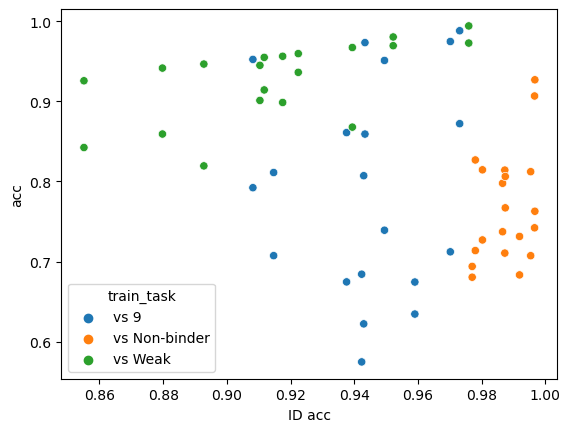

In [14]:
sns.scatterplot(perf_open_df_mean, x='ID acc', y='acc', hue='train_task')

In [19]:
perf_open_df_mean.columns

Index(['train_task', 'train_ag', 'train_neg', 'test_task', 'test_ag',
       'test_neg', 'acc', 'recall', 'precision', 'f1', 'ID acc'],
      dtype='object')

In [40]:
cmap = { 'vs 9' : '#FF5733',
         'vs Non-binder':'#00A6ED',
         'vs Weak':'#FFC300',
         'vs 1': '#8B5F4D'}

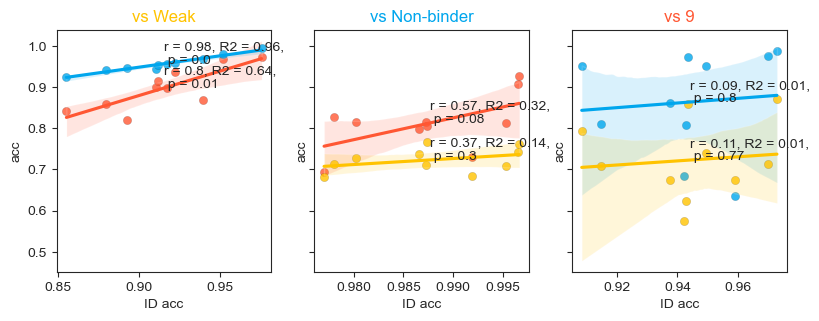

In [95]:
plt.rcParams['svg.fonttype'] = 'none'
sns.set_style("white")
sns.set_style('ticks')

fig, ax = plt.subplots(1, 3, figsize=(3*3.14,3.14), sharey=True)
for i, task in enumerate(['vs Weak', 'vs Non-binder', 'vs 9']):
    df = perf_open_df_mean[perf_open_df_mean['train_task'] == task]
    for test_task in df.test_task.unique():
        df_partition = df[df['test_task'] == test_task]
        sns.regplot(df_partition, x='ID acc', y='acc', ax=ax[i], scatter=True, color=cmap[test_task], scatter_kws={'edgecolor': 'black', 'linewidth': 0.1})
        ax[i].set_title(task, color = cmap[task])
        y = df_partition['acc'].mean()
        x = df_partition['ID acc'].mean()
        r,p = pearsonr(df_partition['acc'], df_partition['ID acc'])
        r = r.round(2)
        p = p.round(2)
        R2 = (r**2).round(2)
        ax[i].text(x=x, y=y, s=f"r = {r}, R2 = {R2},\n p = {p}")

fig.savefig('./figures/ID_OOD_corr.svg')